In [93]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

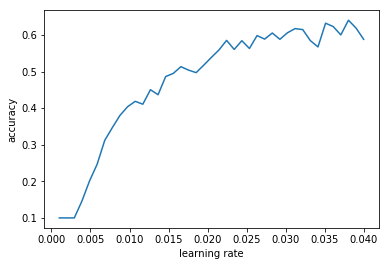

In [73]:
# Figure 1

result = pd.read_csv('./results/cifar10_quick_mults/lrrt.csv')
df = lrrt[['val_acc', 'lr']]
df.columns = ['accuracy', 'learning rate']
sns.lineplot(x='learning rate', y='accuracy', data=df)

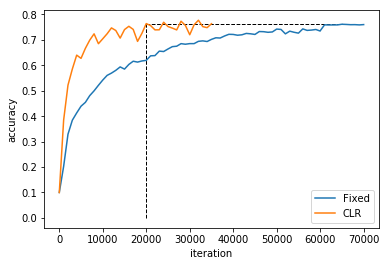

In [133]:
# Figure 2

fixed1 = pd.read_csv(f'{RESULT_DIR}/fixed_1.csv')
fixed2 = pd.read_csv(f'{RESULT_DIR}/fixed_2.csv')
fixed3 = pd.read_csv(f'{RESULT_DIR}/fixed_3.csv')
fixed2['iteration'] = 60000 + fixed2['iteration']
fixed3['iteration'] = 65000 + fixed3['iteration']
fixed = pd.concat([fixed1, fixed2, fixed3], axis=0, ignore_index=True)
df = fixed[['iteration', 'val_acc']]
df.columns = ['iteration', 'accuracy']
sns.lineplot(x='iteration', y='accuracy', data=df, label='Fixed')

t = pd.read_csv(f'{RESULT_DIR}/triangular.csv')
df = t[['iteration', 'val_acc']]
df.columns = ['iteration', 'accuracy']
ax = sns.lineplot(x='iteration', y='accuracy', data=df, label='CLR')

fixed_max = fixed.iloc[fixed['val_acc'].idxmax()]
y = fixed_max['val_acc']
x_start = t[t['val_acc'] > fixed_max['val_acc']].iloc[0]['iteration']
x_end = fixed_max['iteration'] 
ax.hlines(y, x_start, x_end, linestyle='--', linewidth=1)
ax.vlines(x_start, 0, y, linestyle='--', linewidth=1)

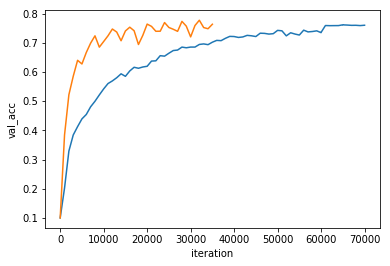

In [63]:
# OTHER

RESULT_DIR = './results/cifar10_quick_mults'

# fixed
fixed1 = pd.read_csv(f'{RESULT_DIR}/fixed_1.csv')
fixed2 = pd.read_csv(f'{RESULT_DIR}/fixed_2.csv')
fixed3 = pd.read_csv(f'{RESULT_DIR}/fixed_3.csv')
fixed2['iteration'] = 60000 + fixed2['iteration']
fixed3['iteration'] = 65000 + fixed3['iteration']
fixed = pd.concat([fixed1, fixed2, fixed3], axis=0, ignore_index=True)
sns.lineplot(x='iteration', y='val_acc', data=fixed)

# triangular
t = pd.read_csv(f'{RESULT_DIR}/triangular.csv')
sns.lineplot(x='iteration', y='val_acc', data=t)

# triangular2
t2 = pd.read_csv(f'{RESULT_DIR}/triangular2.csv')
#sns.lineplot(x='iteration', y='val_acc', data=t2)

decay = pd.read_csv(f'{RESULT_DIR}/decay.csv')
#sns.lineplot(x='iteration', y='val_acc', data=decay)

#exp = pd.read_csv(f'{RESULT_DIR}/exp.csv')
#sns.lineplot(x='iteration', y='val_acc', data=exp)

exp_range = pd.read_csv(f'{RESULT_DIR}/exp_range.csv')
#sns.lineplot(x='iteration', y='val_acc', data=exp_range)

In [110]:
fixed.iloc[fixed['val_acc'].idxmax()]

iteration    65000.000000
trn_loss         0.498635
lr               0.000100
val_loss         0.709927
val_acc          0.761400
Name: 66, dtype: float64

In [59]:
# iteration @ which triangular exceeds fixed
t[t['val_acc'] > fixed['val_acc'].max()].iloc[0]

iteration    20000.000000
trn_loss         0.533820
lr               0.002507
val_loss         0.679671
val_acc          0.763900
Name: 20, dtype: float64

In [61]:
# iteration @ which triangular2 exceeds fixed
t2[t2['val_acc'] > fixed['val_acc'].max()].iloc[0]

iteration    30000.000000
trn_loss         0.690793
lr               0.002559
val_loss         0.684500
val_acc          0.763200
Name: 30, dtype: float64